In [11]:
import pandas as pd
import matplotlib.pyplot as plt

nba = pd.read_csv('nba_2013.csv')

In [12]:
pg_players = nba[nba['pos'] == 'PG']
pd.options.mode.chained_assignment = None
pg_players['ppg'] = pg_players['pts'] / pg_players['g']
pg_players = pg_players[pg_players['tov'] != 0]
pg_players['atr'] = pg_players['ast'] / pg_players['tov']

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(pg_players[['ppg','atr']])
pg_players['cluster'] = kmeans.labels_

C:\Users\MPEIRRON\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


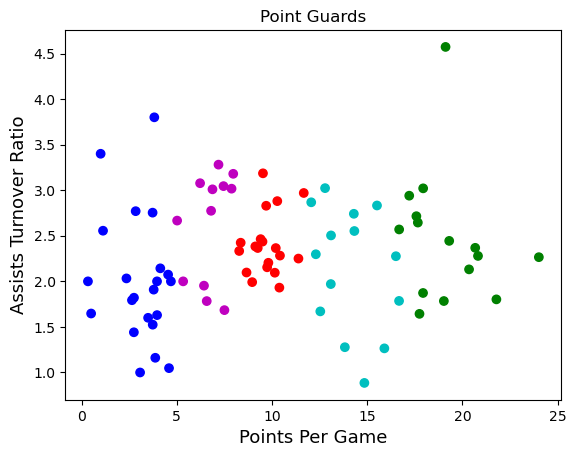

In [17]:
# Define a color map for the clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Add more colors if needed
pg_players['color'] = pg_players['cluster'].map(lambda x: colors[x])

# Scatter plot the players with color coding according to their cluster
plt.scatter(pg_players['ppg'], pg_players['atr'], c=pg_players['color'])
plt.title('Point Guards')
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assists Turnover Ratio', fontsize=13)
plt.show()